In [127]:
! pip install -U textblob
! pip install wordcloud

Requirement already up-to-date: textblob in /anaconda3/lib/python3.6/site-packages (0.15.3)
Requirement not upgraded as not directly required: nltk>=3.1 in /anaconda3/lib/python3.6/site-packages (from textblob) (3.3)
Requirement not upgraded as not directly required: six in /anaconda3/lib/python3.6/site-packages (from nltk>=3.1->textblob) (1.11.0)
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [161]:
import pandas as pd            
from textblob import TextBlob 
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/neep/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

True

In [162]:
df_survey_data = pd.read_csv("Whatsgoodly - Thought Catalog Influencers.csv")
df_questions= df_survey_data.drop_duplicates('Question').set_index('Question')
df_questions

,Segment Type,Segment Description,Answer,Count,Percentage
Question,,,,,
What do you think when an influencer is obviously selling a product?,Mobile,Global results,Is this product cool?,268,0.226
What social platform has influenced your online shopping most?,Mobile,Global results,Facebook,413,0.204
What is the most important trait when defining an influencer?,Mobile,Global results,They're a leading voice in culture,814,0.531
Who are your favorite people to follow online?,Mobile,Global results,Friends,1479,0.611
Does it annoy you when popular social media accounts endorse products or services?,Mobile,Global results,"Yes, very much so",919,0.435
What do you consider an influencer?,Mobile,Global results,A famous person,252,0.218


In [163]:
grouped= df_survey_data.groupby(['Question'])
l_grouped = list(grouped)
df_survey_data=l_grouped[1][1]

In [164]:
#df_influencer1=df_survey_data.loc["What do you think when an influencer is obviously selling a product?"]
#df_influencer2=df_survey_data.loc["What social platform has influenced your online shopping most?"]
#df_influencer3=df_survey_data.loc["What is the most important trait when defining an influencer?"]
#df_influencer4=df_survey_data.loc["Who are your favorite people to follow online?"]
#df_influencer5=df_survey_data.loc["Does it annoy you when popular social media accounts endorse products or services?"]
#df_influencer6=df_survey_data.loc["What do you consider an influencer?"]

COLS = ['Question','Segment','text', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

In [165]:
for index, row in islice(df_survey_data.iterrows(), 0, None):
     new_entry = []
     text_lower= row['Answer'].lower()
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [row['Question'],row['Segment Type'],text_lower,sentiment,subjectivity,polarity]    
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_survey_sentimet_df, ignore_index=True)
df.to_csv('Text_Sentiment_Values1.csv', mode='w', columns=COLS, index=False, encoding="utf-8")

In [166]:
df.head()

,Question,Segment,text,sentiment,subjectivity,polarity
0,What do you consider an influencer?,Mobile,a famous person,"(0.5, 1.0)",1.000000,0.500000
1,What do you consider an influencer?,Mobile,someone with a lot of social media followers,"(0.03333333333333333, 0.06666666666666667)",0.066667,0.033333
2,What do you consider an influencer?,Mobile,popular friends in your network,"(0.6, 0.9)",0.900000,0.600000
3,What do you consider an influencer?,Mobile,all of the above,"(0.0, 0.1)",0.100000,0.000000
4,What do you consider an influencer?,Web,a famous person,"(0.5, 1.0)",1.000000,0.500000


In [171]:
df.describe()

,subjectivity,polarity
count,716.000000,716.000000
mean,0.516667,0.283333
std,0.435237,0.269446
min,0.066667,0.000000
25%,0.091667,0.025000
50%,0.500000,0.266667
75%,0.925000,0.525000
max,1.000000,0.600000


In [172]:
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]
dffilter.describe()

,subjectivity,polarity
count,716.000000,716.000000
mean,0.516667,0.283333
std,0.435237,0.269446
min,0.066667,0.000000
25%,0.091667,0.025000
50%,0.500000,0.266667
75%,0.925000,0.525000
max,1.000000,0.600000


Text(0,0.5,'Range')

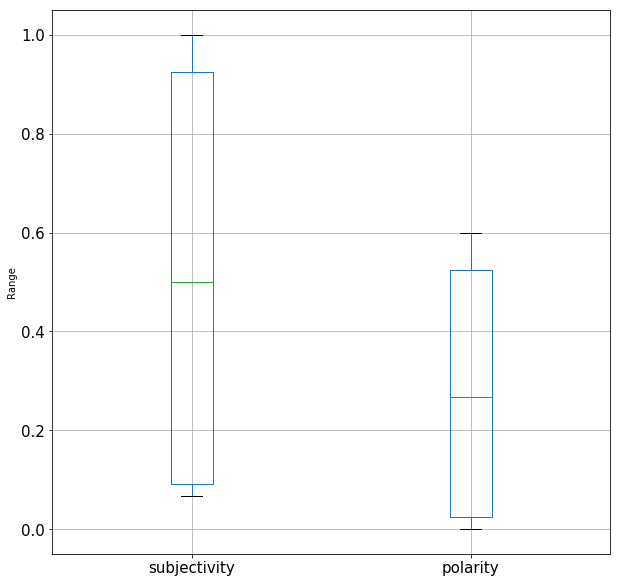

In [173]:
boxplot = dffilter.boxplot(column=['subjectivity','polarity'],fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

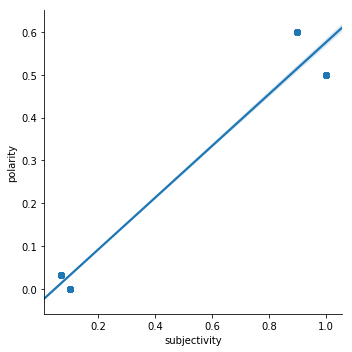

In [170]:
sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True,palette="mute") 

In [174]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.18943124 0.30375758]
 [0.30375758 0.49068531]]
Pearsons correlation: 0.99632


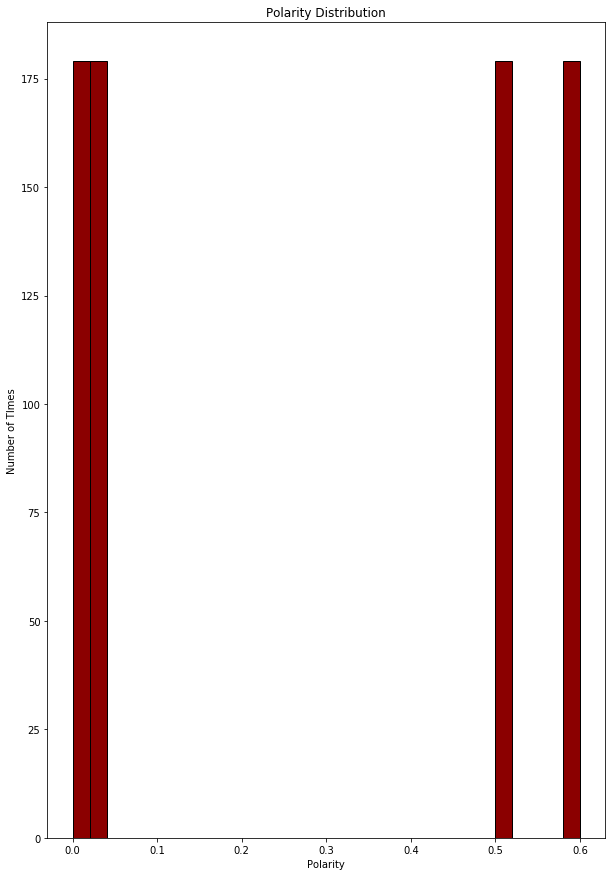

In [175]:
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


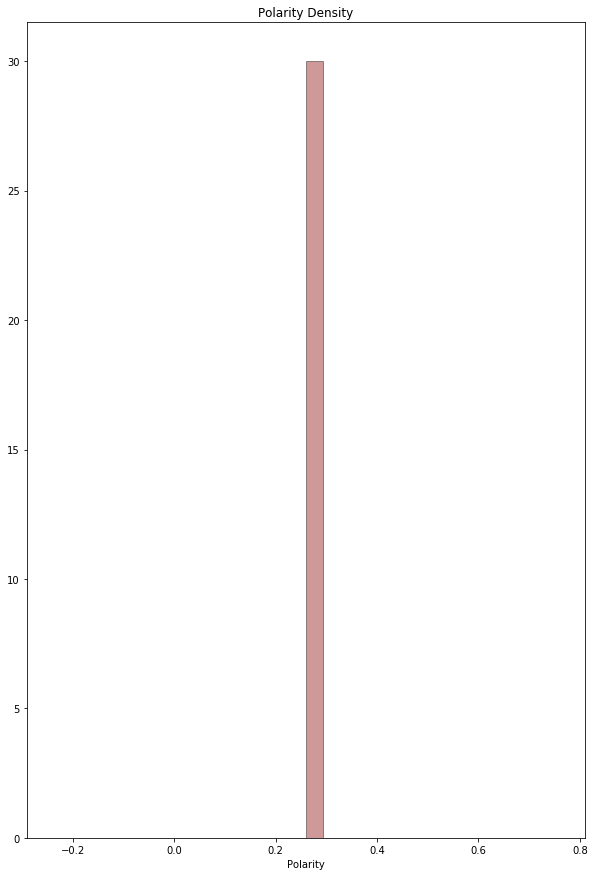

In [140]:
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [176]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
RE_stopwords = r'\b(?:{})\b;'.format('|'.join(stopwords.words('english')))
df.text.str.lower().replace([RE_stopwords,r'\?',r'\!',r'\)',r'\(',r'\&',r'\,',r'\''], ['','','','','','','',''], regex=True)

words = (df.text
           .str.lower()
           .replace([r'\?',r'\!',r'\)',r'\(',r'\&',r'\,',r'\'', RE_stopwords], [' ', '','','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)


words=[word for word in words if word not in RE_stopwords]

Text(0,0.5,'Count')

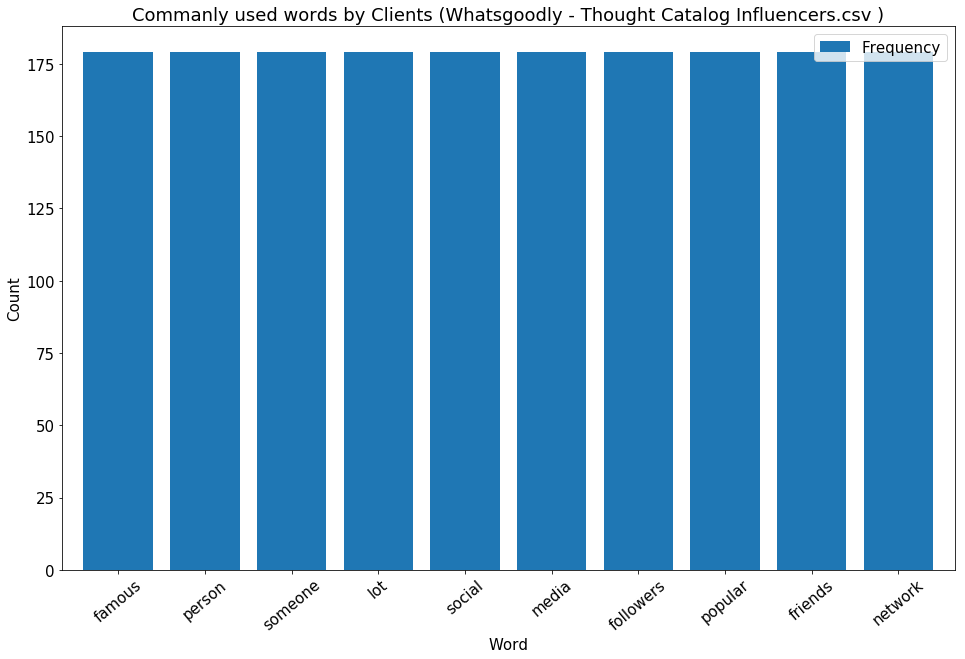

In [182]:
from collections import Counter
rslt = pd.DataFrame(Counter(words).most_common(10),columns=['Word', 'Frequency']).set_index('Word')
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by Clients (Whatsgoodly - Thought Catalog Influencers.csv )")
plt.ylabel("Count")

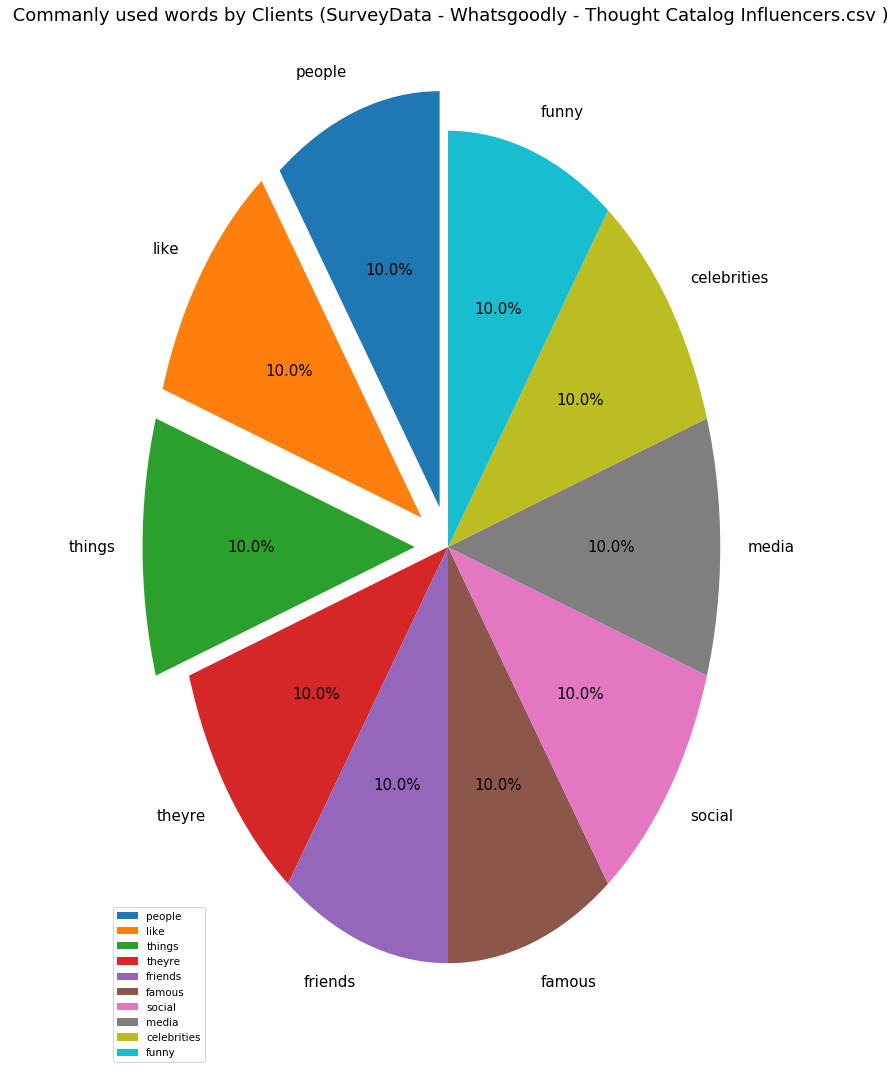

In [183]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,15

#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['people',
        'like',
        'things',
        'theyre',
        'friends',
        'famous',
        'social',
        'media',
        'celebrities',
        'funny']
plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by Clients (SurveyData - Whatsgoodly - Thought Catalog Influencers.csv )')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

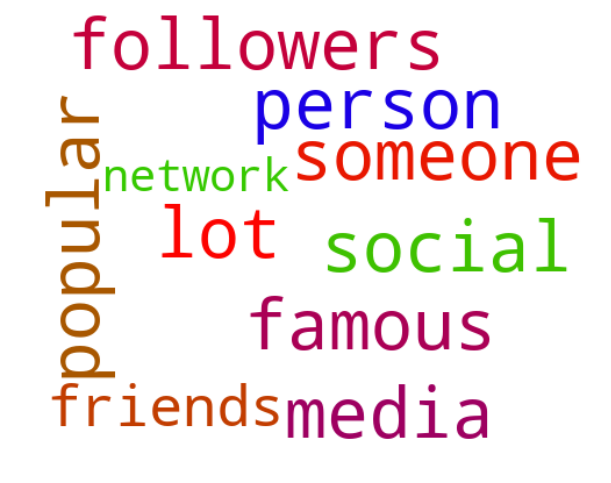

<Figure size 720x720 with 0 Axes>

In [184]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()